http://docs.opencv.org/3.1.0/da/d6e/tutorial_py_geometric_transformations.html`

In [1]:
%matplotlib inline

In [2]:
import cv2
import helpers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
(training_file, 
     validation_file, 
     testing_file) = helpers.get_traffic_signs_data()

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train, y_train, X_train_sizes, X_train_coords = train['features'], train['labels'], train['sizes'], train['coords']

File download skipped, it already exists, use force==True to overwrite.

Skipping unzipping of pickled files, as they've been previously extracted,
use force==True to overwrite


In [4]:
ix = helpers.EXAMPLE_IMG_INDEX

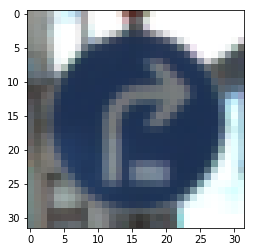

In [5]:
img = X_train[ix][:]
plt.imshow(img)
plt.show()

## Affine transformations

In [6]:
warp_left_top = np.random.randint(1, 10, 2)
warp_left_top

array([7, 9])

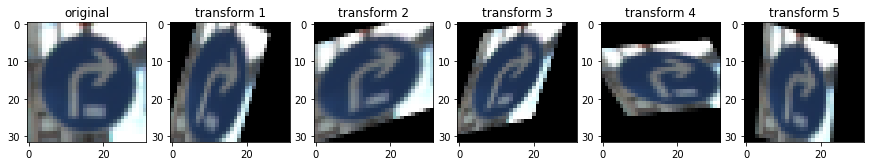

In [7]:
rows, cols, ch = img.shape

x1 = 5
x2 = 25
y1 = 5
y2 = 25

left_top = [x1, y1]
left_bottom = [x1, y2]
right_top = [x2, y1]

n_plots = 5

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, n_plots + 1, 1)
ax.imshow(img)
ax.set_title('original')
    
for i in range(n_plots):
    warp = np.random.uniform(-5, 5, size=6)

    warp_left_top = [x1 + warp[0], y1 + warp[1]]
    warp_left_bottom = [x1 + warp[2], y2 + warp[3]]
    warp_right_top = [x2 + warp[4], y1 + warp[5]]

    pts1 = np.float32([left_top, left_bottom, right_top])
    pts2 = np.float32([warp_left_top, warp_left_bottom, warp_right_top])

    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(img, M, (cols,rows))

    ax = fig.add_subplot(1, n_plots + 1, i + 2)
    ax.imshow(dst)
    ax.set_title('transform {}'.format(i + 1))


In [8]:
class_num = 1
class_nums = [class_num] * n_plots
class_nums

[1, 1, 1, 1, 1]

In [12]:
def affine_transform(img, one_hot_class, replicate=1):
    """
    Performs affine transformation of an image
    
    img       -> image to transform
    replicate -> the number of transformations to perform
    """
    rows, cols, ch = img.shape
    output_size  = (cols, rows)

    x1 = 5
    x2 = 25
    y1 = 5
    y2 = 25

    left_top = [x1, y1]
    left_bottom = [x1, y2]
    right_top = [x2, y1]

    transforms = []
    one_hot_classes = [one_hot_class] * replicate
    
    for i in range(replicate):
        warp = np.random.uniform(-5, 5, size=6)

        warp_left_top = [x1 + warp[0], y1 + warp[1]]
        warp_left_bottom = [x1 + warp[2], y2 + warp[3]]
        warp_right_top = [x2 + warp[4], y1 + warp[5]]

        pts1 = np.float32([left_top, left_bottom, right_top])
        pts2 = np.float32([warp_left_top, warp_left_bottom, warp_right_top])

        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(img, M, output_size)
        
        transforms.append(dst)
        
    return transforms, one_hot_classes

In [13]:
dummy_class = 1
replication_factor = 5

affines, one_hot_classes = affine_transform(img, dummy_class, replication_factor)

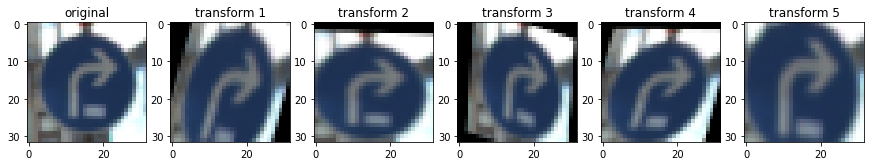

In [14]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, n_plots + 1, 1)
ax.imshow(img)
ax.set_title('original')

for i in range(replication_factor):
    ax = fig.add_subplot(1, n_plots + 1, i + 2)
    ax.imshow(affines[i])
    ax.set_title('transform {}'.format(i + 1))